In [1]:
import numpy.polynomial.polynomial as poly
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [8]:
HPG=pd.read_csv(r"/content/HoaPhatdataset (3).csv")
HPG

,date,price,Open,High,Low,Vol.,Change %
0,9/7/2015,3861.9,3888.4,3941.3,3848.7,6.33M,-1.69%
1,9/8/2015,3994.2,3875.2,3994.2,3861.9,5.76M,3.43%
2,9/9/2015,4060.3,4047.1,4073.5,4007.4,10.08M,1.65%
3,9/10/2015,4020.6,4007.4,4060.3,3967.7,4.93M,-0.98%
4,9/11/2015,3928.1,4007.4,4020.6,3928.1,6.22M,-2.30%
...,...,...,...,...,...,...,...
1807,11/24/2022,14350.0,13700.0,14400.0,13600.0,31.12M,3.99%
1808,11/25/2022,15300.0,14600.0,15300.0,14350.0,26.53M,6.62%
1809,11/28/2022,16350.0,15600.0,16350.0,15600.0,58.84M,6.86%
1810,11/29/2022,17400.0,16600.0,17450.0,16350.0,64.31M,6.42%


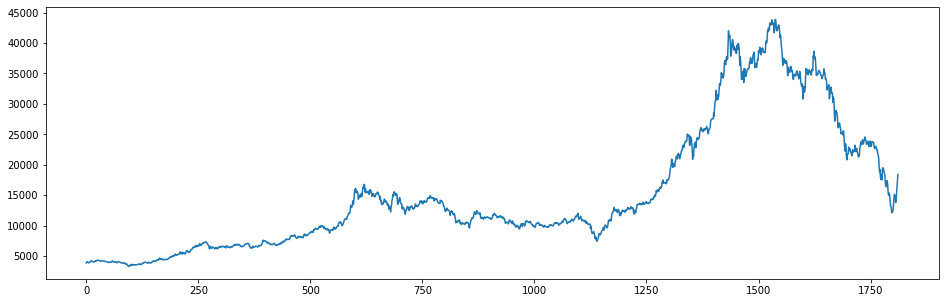

In [9]:
# Convert the 'date' column to a datetime data type
#set the date as the index
# HPG=HPG.set_index(pd.DatetimeIndex(HPG['date'].values))
HPG['Time'] = np.arange(len(HPG.index))
HPG['price'].plot(figsize=(16,5))

In [10]:
HPG_2 = HPG.copy()
#plot the linear regression adn the close price

#create the new column called Numbers

In [13]:
HPG_2['Numbers'] = list(range(0, len(HPG_2)))
#store the 'Numbers' to X and ClosePrice to Y
X = np.array(HPG_2[['Numbers']])
Y = HPG_2['price'].values
linearmodel = LinearRegression().fit(X,Y)
print('Intercept' , linearmodel.intercept_)
print('Slope' , linearmodel.coef_)
# HPG_2['Numbers']

Intercept 867.5024870660654
Slope [15.92604716]


Text(0.5, 1.0, 'Close Price History HPG')

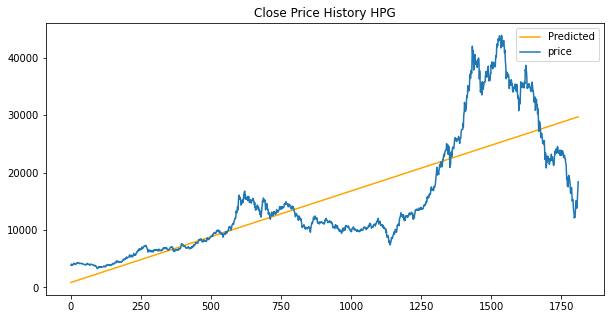

In [14]:
#prepare the data for visualization
#store the predicted prices from the model and store them into y_pred
#y = ax + b 
y_pred = linearmodel.coef_* X + linearmodel.intercept_
#store the y_pred into new colums call Predicted
HPG_2['Predicted'] =  y_pred
#plot the data
HPG_2['Predicted'].plot(figsize=(10,5),legend = True ,color = 'orange')
HPG_2['price'].plot(figsize=(10,5),legend = True )
plt.title('Close Price History HPG')

In [15]:
#độ phù hợp với tập test
#Độ phù hợp với mô hình (cho biết mô hình này phù hợp ở mức %) 
# #Train data
#train model bằng tập HPG_2
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
mae = mean_absolute_error(HPG_2['price'], HPG_2['Predicted'])
mape = mean_absolute_percentage_error(HPG_2['price'], HPG_2['Predicted'])
mse = mean_squared_error(HPG_2['price'], HPG_2['Predicted'])
rmse = np.sqrt(mse)
r2 = r2_score(HPG_2['price'], HPG_2['Predicted'])

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 4629.36
MAPE: 31.87%
MSE: 39882303.91
RMSE: 6315.24
R2: 0.64


In [16]:
#show the possible price for the next day
linearmodel.coef_* (len(HPG_2) + 0) + linearmodel.intercept_ 

array([29725.49993978])

In [ ]:
x = np.array(POW.Time, dtype = float)
y = np.array(POW.Price, dtype = float)
z = [991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008]

In [ ]:
coefs = poly.polyfit(x, y,1)
x_new = np.linspace(x[0], x[-1] + no_of_predictions, num = len(x) + no_of_predictions)
ffit = poly.polyval(x_new, coefs)
pred = poly.polyval(z, coefs)
predictions = pd.DataFrame(datelist_future,pred)
datelist_future
new_date=POW.index.append(datelist_future)
new_date
datelist_future

DatetimeIndex(['2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16',
               '2022-12-17', '2022-12-18', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24',
               '2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', freq='D')

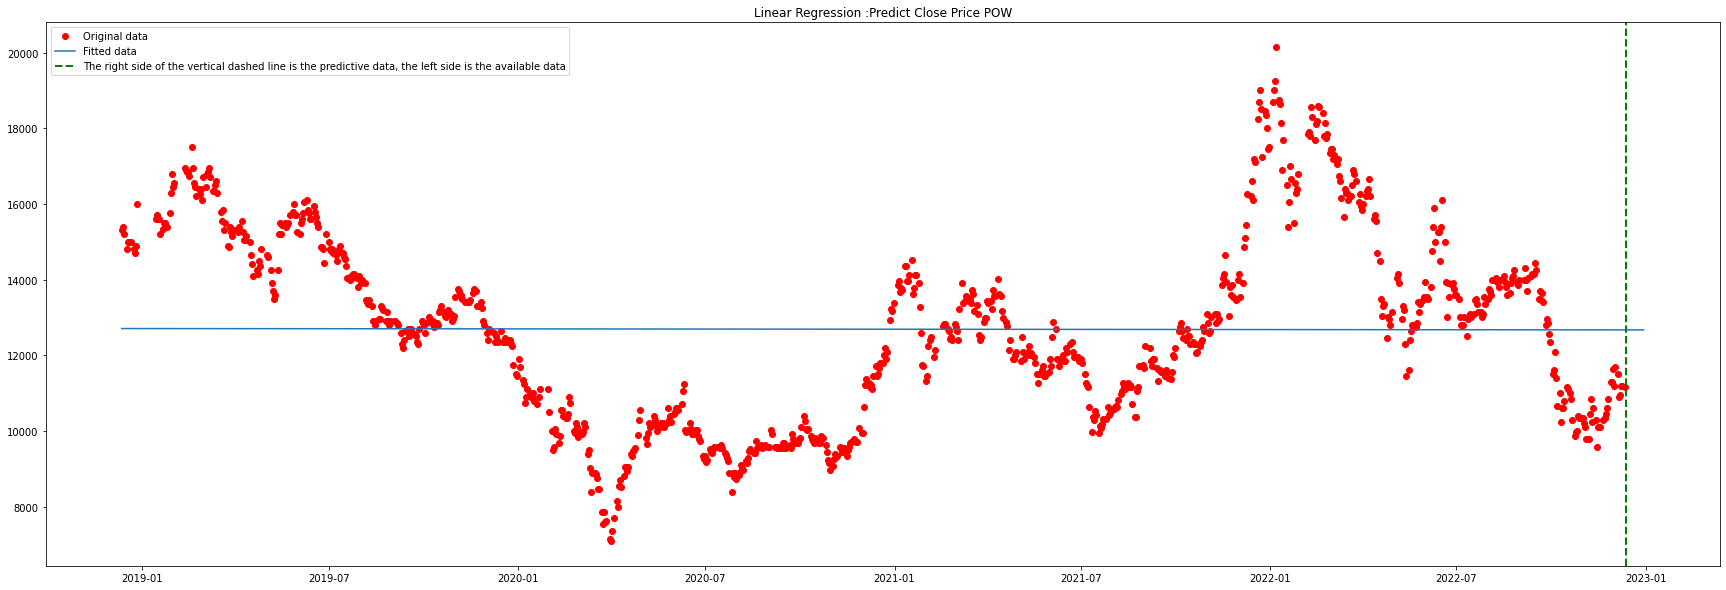

,Date,Price,Open,High,Low,Vol.,Change %,Time
2018-12-12,12/12/2018,15300,15100,15400,15100,540.08K,2.00%,0
2018-12-13,12/13/2018,15400,15400,15500,15300,896.69K,0.65%,1
2018-12-14,12/14/2018,15200,15400,15500,15200,1.08M,-1.30%,2
2018-12-17,12/17/2018,14800,15300,15300,14800,983.13K,-2.63%,3
2018-12-18,12/18/2018,15000,14700,15000,14400,1.88M,1.35%,4
...,...,...,...,...,...,...,...,...
2022-12-06,12/6/2022,10900,11500,11550,10900,12.34M,-5.22%,986
2022-12-07,12/7/2022,10950,10900,11150,10750,8.78M,0.46%,987
2022-12-08,12/8/2022,11200,11100,11350,11000,7.99M,2.28%,988
2022-12-09,12/9/2022,11200,11300,11300,11050,4.90M,0.00%,989


In [ ]:
plt.rcParams['figure.figsize'] = [30, 10]
plt.plot(POW.index, y, 'ro', label="Original data")
plt.plot(new_date, ffit, label = "Fitted data")
plt.axvline( x = min(datelist_future), color='green', linewidth=2, linestyle='--', label = 'The right side of the vertical dashed line is the predictive data, the left side is the available data')
plt.legend(loc='upper left')
plt.title("Linear Regression :Predict Close Price POW")
plt.show()
POW

NameError: ignored